<h1>Digit Dataset - ANN vs CNN</h1>

Hier geht es darum, ein kurzen Vergleich aufzustellen und den Score zu vergleichen, die die beiden Ansätze liefern.

Bei einfachen Datasets wie hier können beide gut performen. Bei Datsets wie CIFAR-10 schneidet das CNN besser ab. 

In [65]:
# Imports.
import tensorflow as tf
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

In [66]:
# Lade Daten
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [67]:
X_train.shape

(60000, 28, 28)

In [18]:
y_test[0]

7

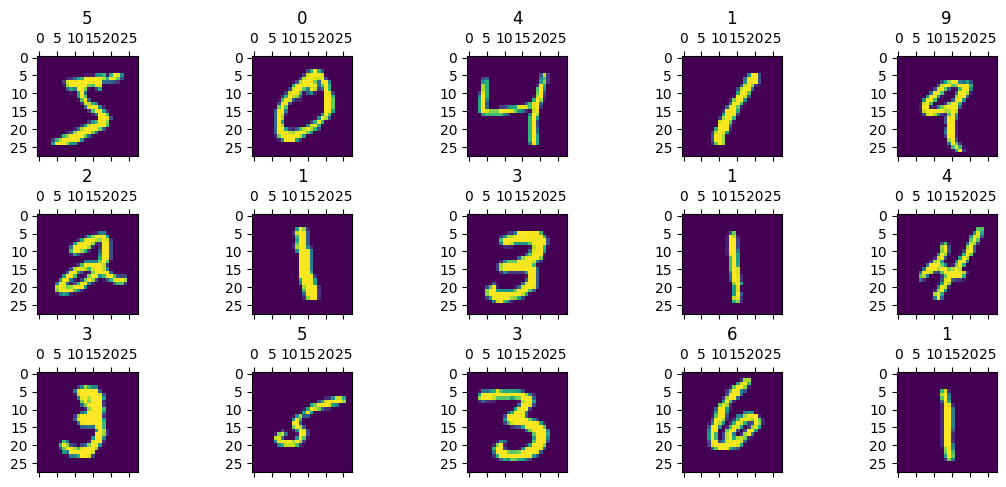

In [16]:
numer_plots = 15
fig, ax = plt.subplots(3, 5, figsize=(11, 5))
ax = ax.ravel()

for i in range(numer_plots):
    plt.tight_layout(pad=0.5)
    ax[i].title.set_text(y_train[i])
    ax[i].matshow(X_train[i])

In [68]:
# Normalisieren
X_train = X_train / 255
X_test  = X_test  / 255

<h2>ANN</h2>

In [24]:
ann_model = tf.keras.Sequential([
    # Flattern 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu', name='L1'),
    tf.keras.layers.Dense(32, activation='relu', name='L2'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

ann_model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',  # Klassen als int. 
    metrics   = ['accuracy']
)

In [25]:
ann_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 854us/step - loss: 0.2993 - accuracy: 0.9144
Epoch 2/20
1875/1875 [==============================] - 2s 875us/step - loss: 0.1340 - accuracy: 0.9601
Epoch 3/20
1875/1875 [==============================] - 2s 848us/step - loss: 0.0977 - accuracy: 0.9700
Epoch 4/20
1875/1875 [==============================] - 2s 832us/step - loss: 0.0787 - accuracy: 0.9756
Epoch 5/20
1875/1875 [==============================] - 2s 826us/step - loss: 0.0637 - accuracy: 0.9794
Epoch 6/20
1875/1875 [==============================] - 2s 823us/step - loss: 0.0535 - accuracy: 0.9828
Epoch 7/20
1875/1875 [==============================] - 2s 828us/step - loss: 0.0446 - accuracy: 0.9860
Epoch 8/20
1875/1875 [==============================] - 2s 840us/step - loss: 0.0401 - accuracy: 0.9864
Epoch 9/20
1875/1875 [==============================] - 2s 839us/step - loss: 0.0352 - accuracy: 0.9888
Epoch 10/20
1875/1875 [==============================] - 2s 829u

In [26]:
ann_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 737us/step - loss: 0.1321 - accuracy: 0.9763


[0.13210536539554596, 0.9763000011444092]

<h3>Sonstiges</h3>

In [35]:
len(ann_model.get_layer('L2').get_weights()[0]) == 64

True

In [37]:
preds = ann_model.predict(X_test)

313/313 [==============================] - 0s 702us/step


In [38]:
preds[0]

array([9.1506140e-03, 6.8508846e-01, 1.6627917e-02, 9.7384334e-01,
       9.6619251e-06, 4.0386482e-08, 3.9108165e-12, 1.0000000e+00,
       1.2259893e-04, 8.9676261e-01], dtype=float32)

In [41]:
target_predicted = [np.argmax(x) for x in ann_model.predict(X_test) ]

313/313 [==============================] - 0s 676us/step


In [44]:
print(classification_report(y_test, target_predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<h2>CNN</h2>

In [97]:
cnn_model = tf.keras.Sequential([
   
    tf.keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', name="cov_1"),  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu', name="cov_2"),  
    tf.keras.layers.MaxPooling2D((2,2)), 
   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax') 
])

cnn_model.compile(
    optimizer = "adam",
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

In [103]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train_shaped = X_train.reshape(-1, 28, 28, 1)
X_test_shaped = X_test.reshape(-1, 28, 28, 1)

In [104]:
X_train_shaped = X_train_shaped / 255
X_test_shaped = X_test_shaped / 255

In [100]:
cnn_model.fit(X_train_shaped, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2663 - accuracy: 0.9167
Epoch 2/4
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0897 - accuracy: 0.9726
Epoch 3/4
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0648 - accuracy: 0.9797
Epoch 4/4
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0513 - accuracy: 0.9841


In [105]:
cnn_model.evaluate(X_test_shaped, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0518 - accuracy: 0.9835


[0.05179412290453911, 0.9835000038146973]

In [106]:
target_predicted = [np.argmax(x) for x in ann_model.predict(X_test_shaped) ]

313/313 [==============================] - 0s 708us/step


In [107]:
print(classification_report(y_test, target_predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.92      0.98      0.95      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.91      0.94       892
           6       0.98      0.94      0.96       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000

